In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import MSTL
import os

In [29]:
FILE_DIR = './load.csv'
FIG_DIR = './trend_plots/'

In [30]:
if not os.path.exists(FIG_DIR):
    os.makedirs(FIG_DIR)

In [31]:
data = pd.read_csv(FILE_DIR)
# Convert the 'date' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y/%m/%d %H:%M')
display(data)

,Timestamp,Load
0,2023-01-01 00:00:00,10.89
1,2023-01-01 00:15:00,10.44
2,2023-01-01 00:30:00,10.89
3,2023-01-01 00:45:00,10.29
4,2023-01-01 01:00:00,10.34
...,...,...
35035,2023-12-31 22:45:00,8.10
35036,2023-12-31 23:00:00,6.62
35037,2023-12-31 23:15:00,8.94
35038,2023-12-31 23:30:00,8.25


In [32]:
decomposition = MSTL(data['Load'], periods=(96, 96*7, 96*7*4)).fit()

In [42]:
decomposition.seasonal

,seasonal_96,seasonal_672,seasonal_2688
0,-0.706002,1.136578,0.516322
1,-0.758160,0.425425,0.877099
2,0.359077,0.292396,0.478816
3,-0.315962,0.419121,0.925359
4,-0.553228,0.600110,0.323298
...,...,...,...
35035,-3.264029,-0.015580,1.124551
35036,-5.247437,0.109570,0.931137
35037,-2.535416,-0.059710,1.172026
35038,-2.877034,-0.136471,0.562835


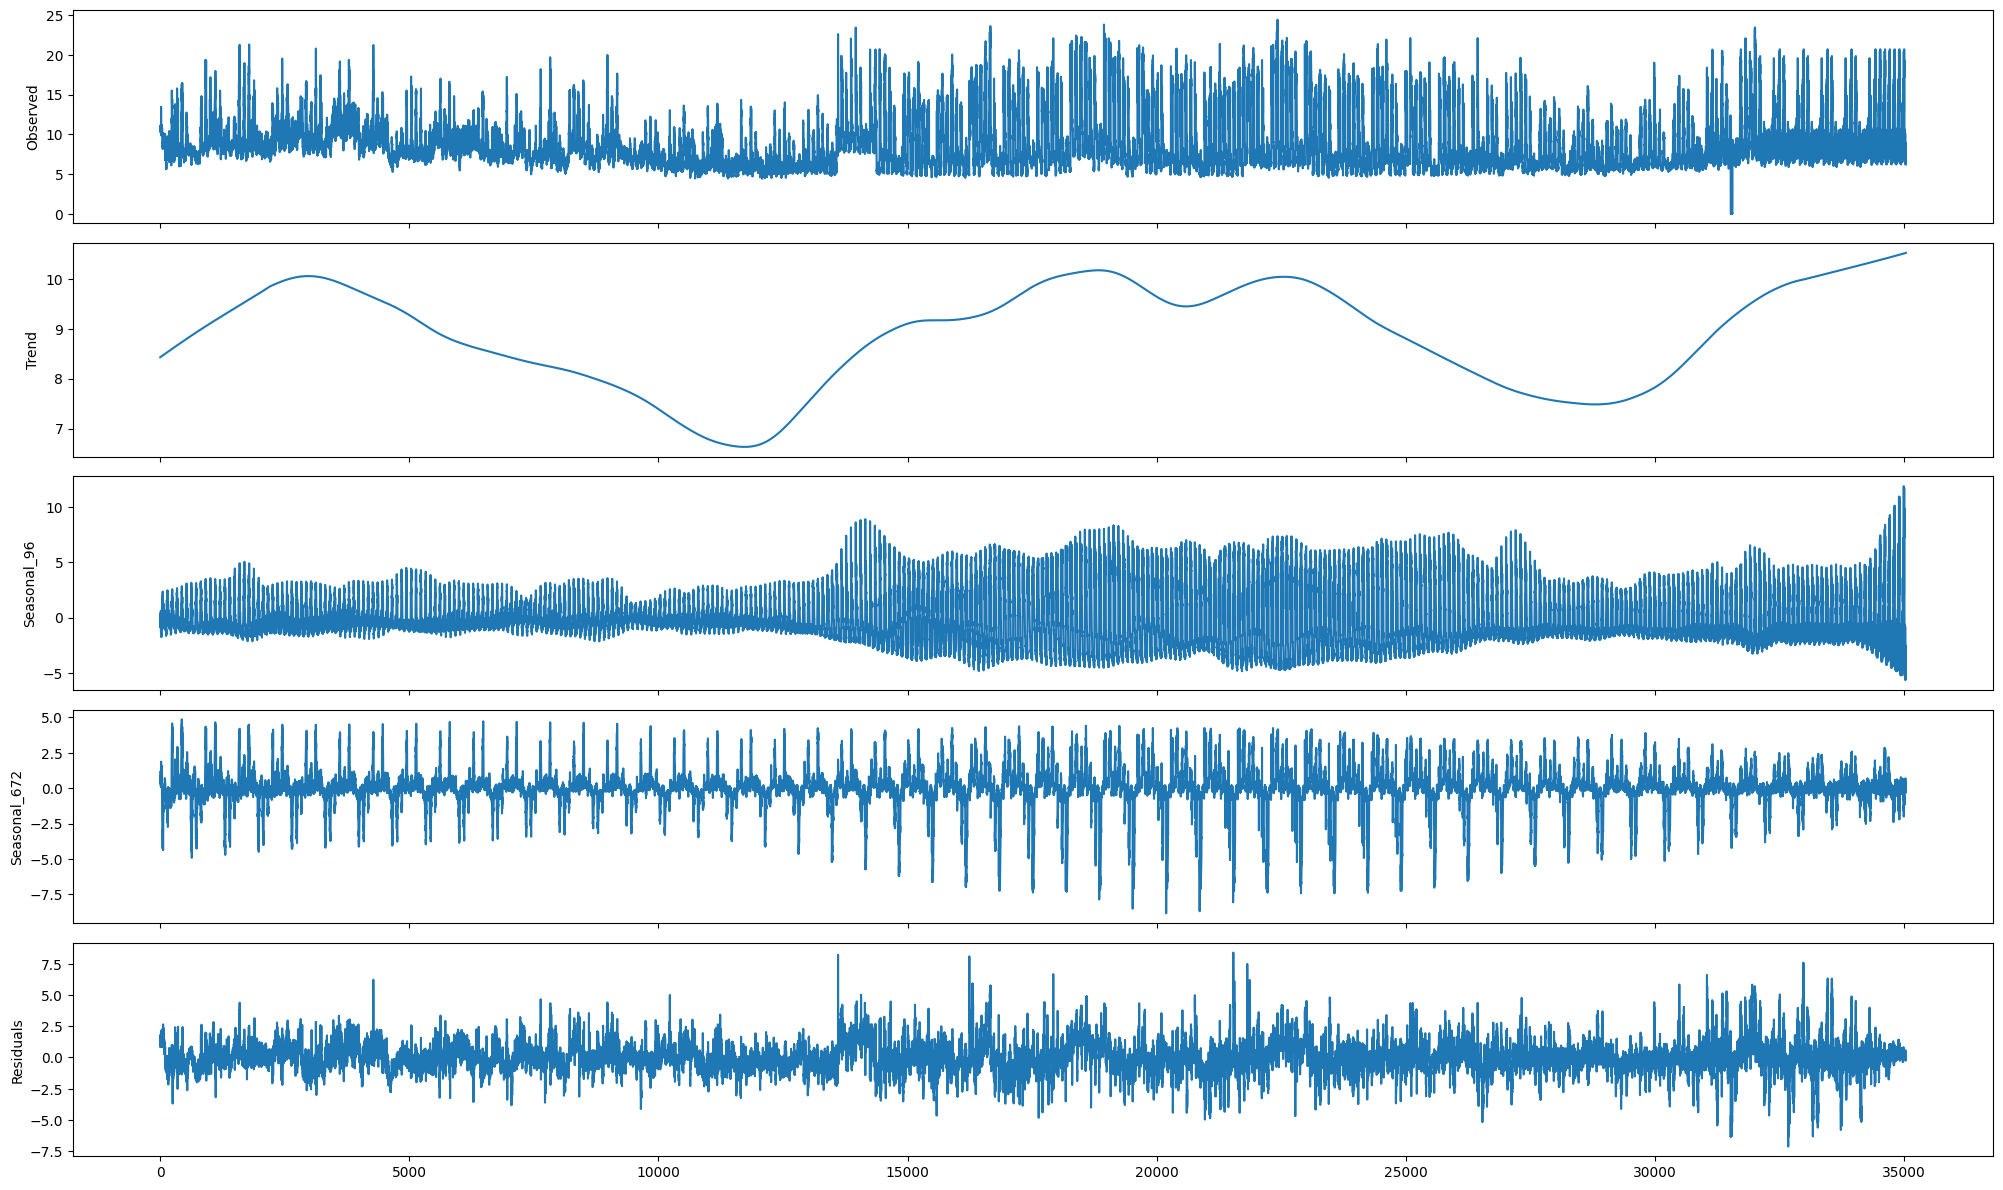

In [50]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, sharex=True,figsize=(20, 12))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal['seasonal_96'])
ax3.set_ylabel('Seasonal_96')

ax4.plot(decomposition.seasonal['seasonal_672'])
ax4.set_ylabel('Seasonal_672')

ax5.plot(decomposition.resid)
ax5.set_ylabel('Residuals')

plt.tight_layout()
plt.savefig(FIG_DIR+'decomposition.png')

In [34]:
data['Trend'] = np.array(decomposition.trend)
data['Seasonal'] = np.array(decomposition.seasonal)
data['Residuals'] = np.array(decomposition.resid)

ValueError: Expected a 1D array, got an array with shape (35040, 3)

In [ ]:
data

,Timestamp,Load,Trend,Seasonal,Residuals
0,2023-01-01 00:00:00,10.89,9.553654,-0.159716,1.496062
1,2023-01-01 00:15:00,10.44,9.550146,-0.520398,1.410252
2,2023-01-01 00:30:00,10.89,9.546624,0.656323,0.687054
3,2023-01-01 00:45:00,10.29,9.543088,-0.069760,0.816672
4,2023-01-01 01:00:00,10.34,9.539539,-0.285858,1.086319
...,...,...,...,...,...
35035,2023-12-31 22:45:00,8.10,10.866100,-2.903279,0.137179
35036,2023-12-31 23:00:00,6.62,10.865838,-4.621400,0.375562
35037,2023-12-31 23:15:00,8.94,10.865582,-2.060108,0.134526
35038,2023-12-31 23:30:00,8.25,10.865332,-2.690391,0.075059


In [ ]:
data.corr()

,Timestamp,Load,Trend,Seasonal,Residuals
Timestamp,1.000000,0.026240,0.055847,0.000187,-0.000178
Load,0.026240,1.000000,0.497131,0.750628,0.494020
Trend,0.055847,0.497131,1.000000,-0.000110,0.065132
Seasonal,0.000187,0.750628,-0.000110,1.000000,0.036939
Residuals,-0.000178,0.494020,0.065132,0.036939,1.000000
